In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df = pd.read_csv('/kaggle/input/emails/emails.csv')

In [3]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
ham = spam_df[spam_df['spam']==0]

In [8]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
spam=spam_df[spam_df['spam']==1]

In [10]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [11]:
print('Spam Percentage=', (len(spam)/len(spam_df))*100,'%')

Spam Percentage= 23.88268156424581 %


In [12]:
print('Ham Percentage=', (len(ham)/len(spam_df))*100,'%')

Ham Percentage= 76.11731843575419 %


In [13]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


<Axes: ylabel='count'>

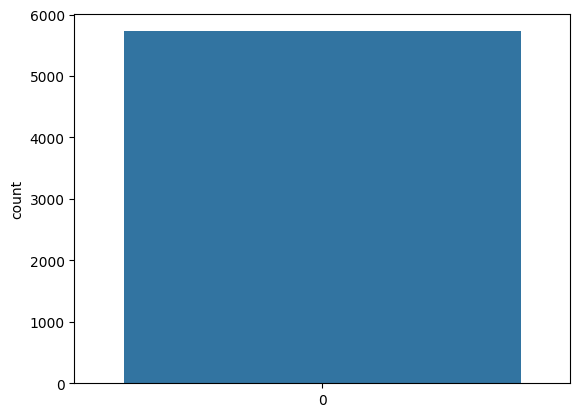

In [14]:
sns.countplot(spam_df['spam'], label='Count Spam vs Ham')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data=['This is the first document', 'This document is the second document', 'And this document is the third one', 'Is this the first document?']
sample_vectorizer = CountVectorizer()

In [16]:
X = sample_vectorizer.fit_transform(sample_data)

In [17]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 1 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [18]:
print(sample_vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [20]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [21]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
spamham_countvectorizer.shape

(5728, 37303)

In [23]:
label=spam_df['spam'].values

In [24]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [25]:

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer,label)

MultinomialNB()

In [26]:
testing_sample =['Free money!!!', 'Hi Kim, please let me know if you need any further information.']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [27]:
test_predict=NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [28]:
testing_sample =['Hello I am Ryan, I would like to book a hotel in Bali by January 24th', 'money is viagra!!!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict=NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1])

In [29]:
X=spamham_countvectorizer
y=label

In [30]:
X.shape

(5728, 37303)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix


In [34]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([1, 0, 1, ..., 0, 1, 1])

<Axes: >

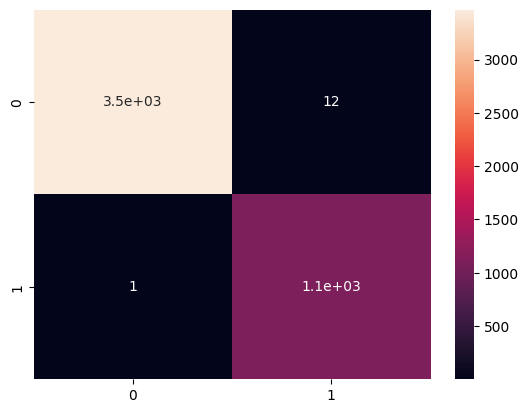

In [35]:
cm=confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [36]:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([0, 1, 0, ..., 0, 0, 0])

<Axes: >

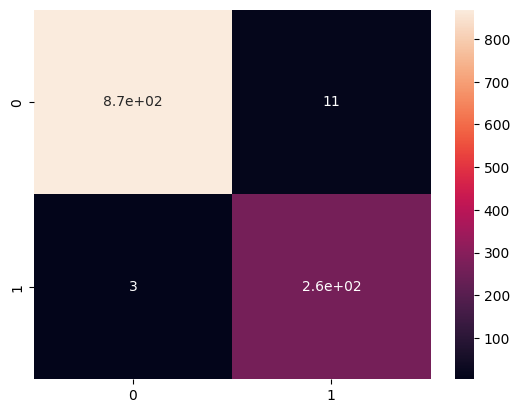

In [37]:
cm=confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       880
           1       0.96      0.99      0.97       266

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

